### Libraries

In [2]:
%matplotlib inline
import numpy as np
import os
from glob import glob
# import cv2
import skimage.io as skio
import matplotlib.pyplot as plt

### Load data

In [3]:
refDir = r'/media/banikr2/DATA/Diesel_block/4_refocus'
segDir = r'/media/banikr2/DATA/Diesel_block/5_segmented'
refFiles = sorted(glob(os.path.join(refDir, '*.tif')))#.sort()
segFiles = sorted(glob(os.path.join(segDir, '*.tif')))#.sort()

Same number of image slices:

In [6]:
len(refFiles), len(segFiles)

(294, 294)

In [4]:
# im = cv2.imread(refFiles[0], -1)
im = skio.imread(refFiles[200], plugin="tifffile")
sg = skio.imread(segFiles[200], plugin="tifffile")

In [16]:
im.dtype, im.shape, sg.dtype, sg.shape

(dtype('uint8'), (900, 900, 3), dtype('uint8'), (900, 900, 3))

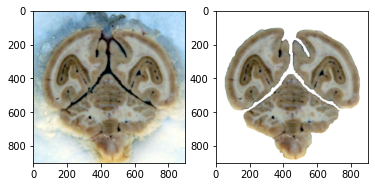

In [5]:
plt.subplot(121)
plt.imshow(im)
# plt.axis("off")
plt.subplot(122)
plt.imshow(sg)
# plt.axis("off")
plt.show()

``` matlab
>> whos img21
  Name         Size                 Bytes  Class    Attributes

  img21      900x900x3            2430000  uint8  

>> whos seg21
  Name        Size                 Bytes  Class    Attributes
  seg21      900x900x3            2430000  uint8              
```

ground truth should be converted to a binary mask?<br> $0$ --> non-brain part of the slice <br> $1$ --> brain part of the slice

In [20]:
sg_chunk = sg[250:400,200:350,:]

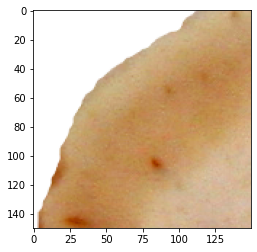

In [30]:
plt.imshow(sg_chunk)

Convert to grayscale `rgb2gray` in *Matlab*

|<p>|<p>|<p>|<p>|
|:-:|:-:|:-:|:-:|
| <img src="../Images/rgb_21.jpg" style="width: 200px;"/> _slice #020_ |<img src="../Images/seg_21.jpg" style="width: 200px;"/> |<img src="../Images/grayscale_21.jpg" style="width: 200px;"/> |<img src="../Images/binarymask_21.jpg" style="width: 200px;"/>  |
| <img src="../Images/rgb_201.jpg" style="width: 200px;"/> _slice #200_|<img src="../Images/seg_201.jpg" style="width: 200px;"/>|<img src="../Images/grayscale_201.jpg" style="width: 200px;"/> |<img src="../Images/binarymask_201.jpg" style="width: 200px;"/>  |
|_refocused image(RGB)_|_segmented image(RGB)_|_grayscaled_|_binary mask_|

non-brain pixels were removed by `regionprops` Matlab

|<p>|<p>|
|:-:|:-:|
| <img src="../Images/binarymask_190.png" style="width: 200px;"/> |<img src="../Images/binarybrainmask_190.png" style="width: 200px;"/> |

### ToDo:
1. ~~Remove isolated pixels outside brain.~~
2. ~~Create binary/target masks for all the slices and datastructure...~~
3. Tiling for image and masks.
4. Dataset/DataLoader in pytorch.
5. Network architecture.
6. Loss function(binary cross entropy or ?)

### Questions/doubt:
1. How to validate the created binary masks? 
2. ~~There are small pixels scattered outside brain regions, do we need to remove those by erosion or other morphological operations?~~
 - ~~**caveats:** some slices have unit brain, some have two or three parts, _largest connected component_ may not work.~~